In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import optimizers
from keras import losses
from keras import metrics

from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets) =boston_housing.load_data("boston_housing.npz")

In [3]:
train_data.shape,test_data.shape

((404, 13), (102, 13))

In [4]:
train_targets.shape,test_targets.shape

((404,), (102,))

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
test_data -= mean
std = train_data.std(axis=0)
train_data /=std
test_data /=std

In [6]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(),
                  loss=losses.mse,
                  metrics=['mae'])
    return model

In [14]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ],
                                        axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ],
                                           axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold 0












processing fold 1
processing fold 2
processing fold 3


In [15]:
all_scores

[2.0246362957623925,
 2.2539143373470494,
 2.9320301112562124,
 2.4225799824931835]

In [30]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_history = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ],
                                        axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ],
                                           axis=0)
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=1,
                        verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_history.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [31]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [32]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)
]


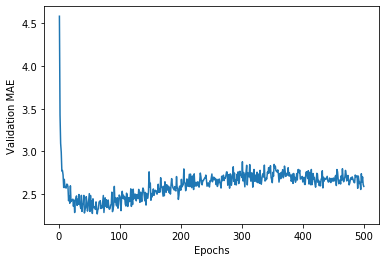

In [33]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs'),plt.ylabel('Validation MAE')
plt.show()

In [42]:
def smooth_curve(points, factor=0.5):
    smooth_points = []
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            smooth_points.append(previous * factor + point*(1 - factor ))
        else:
            smooth_points.append(point)
    return smooth_points

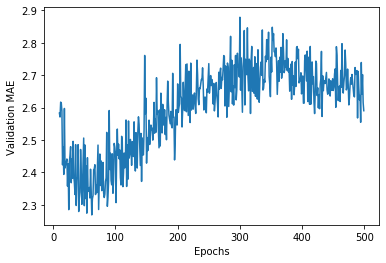

In [43]:
smooth_mae_history = average_mae_history[10:]
plt.plot(range(10, len(smooth_mae_history) + 10), smooth_mae_history)
plt.xlabel('Epochs'), plt.ylabel('Validation MAE')
plt.show()

In [40]:
model=build_model()
model.fit(train_data,train_targets,epochs=60,batch_size=16,verbose=0)
(test_mse_score,test_mae_score)=model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 4ms/step


In [41]:
print((test_mse_score,test_mae_score))

(18.760881311753216, 2.730731992160573)
